Luego de haber cerrado su cápsula de aprendizaje de clasificación, se le ha
determinado que averigue los intereses que pueden tener los clientes de la
empresa KEPPLER, esto es necesario, para que se entregue la información al
departamento de marketing y puedan realizar campañas fidelizar a sus
clientes.
En el archivo clientes.cvs encontrará el registro de cada uno de ellos, además
el archivo contiene 9 categorías -actividades laborales

1. Realice un resumen estadístico de sus datos.
2. Entregue gráficos que acompañen los hayazgos encontrados en el
punto 1.
3. Encuentre una relación o grafique las variables: op, ex y ag, además de
las categorías.
4. Determine cuántos k o clúster son adecuados para esta consulta.
5. Realice un modelo de kmeans con los cluster definidos en el punto 4.
6. Entregue una representación gráfica de los cluster.
7. A qué conclusión llega y cuál es su recomendación como experto.


In [2]:
import pandas as pd
from sklearn import datasets
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Cargar el archivo CSV en un DataFrame
data = pd.read_csv("clientes.csv")
# Establecer 'usuario' como índice
data = data.set_index('usuario')
display(data)


In [5]:
data.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 3gerardpique to _josecoronado_
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   op         140 non-null    float64
 1   co         140 non-null    float64
 2   ex         140 non-null    float64
 3   ag         140 non-null    float64
 4   ne         140 non-null    float64
 5   wordcount  140 non-null    float64
 6   categoria  140 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 12.8+ KB


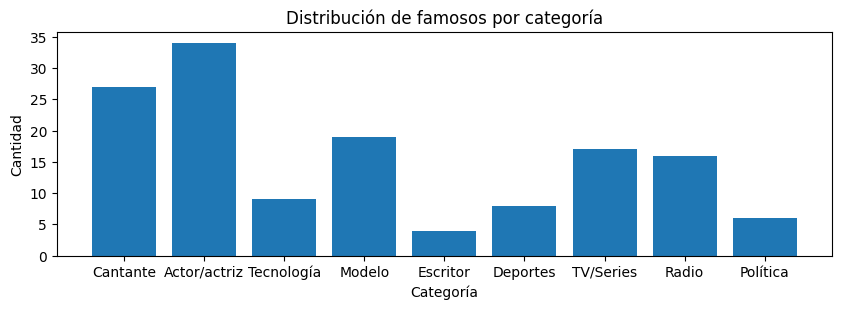

In [8]:
# Obtener conteo de cada categoría
categoria_count = data['categoria'].value_counts()

# Crear gráfico de barras
plt.figure(figsize=(10,2.9))
plt.bar(categoria_count.index, categoria_count.values)

# Establecer etiquetas en el eje x
plt.xticks(categoria_count.index, ['Actor/actriz', 'Cantante', 'Modelo', 'TV/Series', 'Radio', 'Tecnología', 'Deportes', 'Política', 'Escritor'])

# Establecer título y etiquetas de los ejes
plt.title("Distribución de famosos por categoría")
plt.xlabel("Categoría")
plt.ylabel("Cantidad")

# Mostrar gráfico
plt.show()

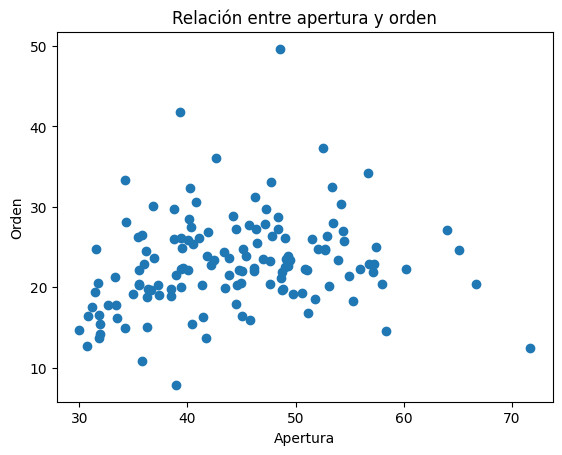

In [9]:
# Crear gráfico de dispersión
plt.scatter (data['op'], data['co'])

# Establecer título y etiquetas de los ejes
plt.title("Relación entre apertura y orden")
plt.xlabel("Apertura")
plt.ylabel("Orden")

# Mostrar gráfico
plt.show()

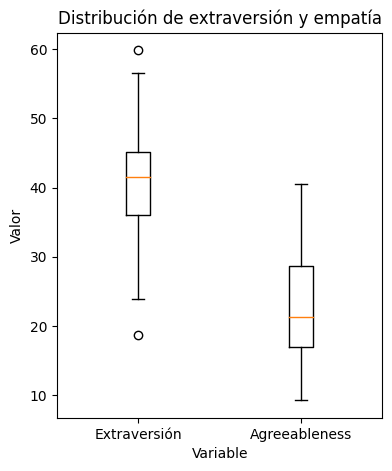

In [10]:
# Crear gráfico de caja
plt.figure(figsize=(4.2,5))
plt.boxplot([data['ex'], data['ag']])

# Establecer etiquetas en el eje x
plt.xticks([1, 2], ['Extraversión', 'Agreeableness'])

# Establecer título y etiquetas de los ejes
plt.title("Distribución de extraversión y empatía")
plt.xlabel("Variable")
plt.ylabel("Valor")

# Mostrar gráfico
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

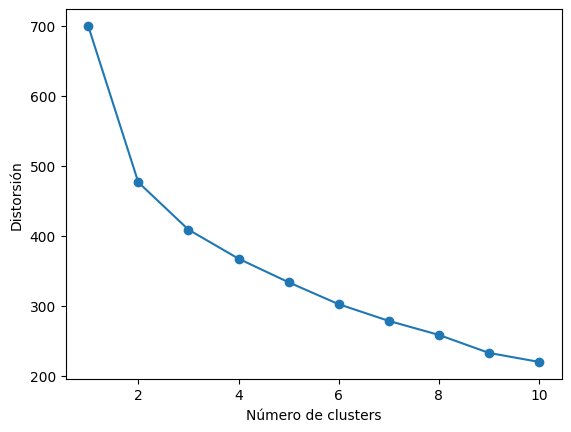

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


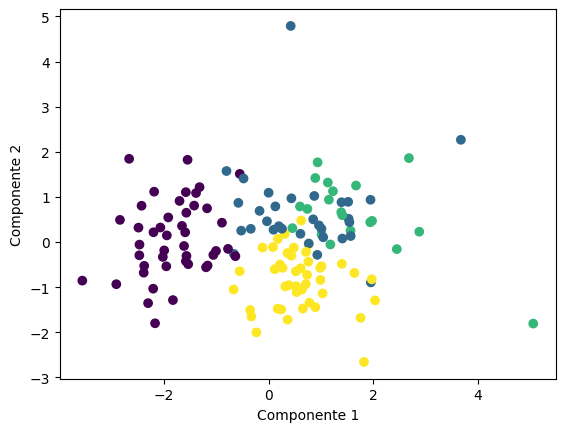

In [12]:
# Seleccionar atributos relevantes
X = data.iloc[:, 1:6]

# Normalizar datos
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Determinar número óptimo de clusters
distortions = []
for i in range(1, 11):
    kmeans = KMeans (n_clusters=i)
    kmeans.fit(X_norm)
    distortions.append(kmeans.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Distorsión')
plt.show()

# Realizar clustering con k=4
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_norm)
labels = kmeans.labels_

# Visualizar resultados con PCA (análisis de componente principal)
pca = PCA (n_components=2)
X_pca = pca.fit_transform(X_norm)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show();

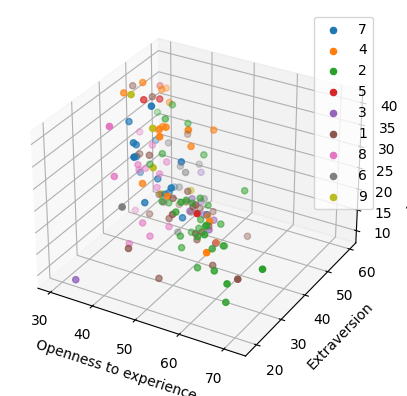

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

categorias = data['categoria'].unique()

for categoria in categorias:
    x = data[data['categoria'] == categoria]['op']
    y = data[data['categoria'] == categoria]['ex']
    z = data[data['categoria'] == categoria]['ag']

    ax.scatter(x, y, z, label=categoria)

ax.set_xlabel('Openness to experience')
ax.set_ylabel('Extraversion')
ax.set_zlabel('Agreeableness')
plt.legend()
plt.show()


Podemos observar que hay cierta relación entre las variables, especialmente entre op y ex, y entre ex y ag. También podemos notar que las categorías de Deportes y Política están más agrupadas en una zona del gráfico, mientras que las categorías de TV, Series y Tecnología se encuentran más dispersas.

In [14]:
variables = ['op', 'co', 'ex', 'ag', 'ne', 'wordcount']
X = data[variables].values
n_clusters = 3

#Aplicamos el modelo de k-means y obtenemos las etiquetas de cada punto:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
etiquetas = kmeans.fit_predict(X)

data['cluster'] = etiquetas

centroides = kmeans.cluster_centers_
num_puntos = pd.Series(etiquetas).value_counts().sort_index()

for i, centroide in enumerate(centroides):
    print(f"Centroide {i}: {centroide}")
    print(f"Número de puntos en cluster {i}: {num_puntos[i]}")

Centroide 0: [ 47.2425514   23.91600052  40.13164636  19.99707409   7.93251904
 101.53036119]
Número de puntos en cluster 0: 67
Centroide 1: [ 46.49143107  25.34137918  37.01146479  19.81602868   8.69631846
 168.11213214]
Número de puntos en cluster 1: 28
Centroide 2: [38.9118158  20.10818429 44.04174649 29.19869211  7.66751098 51.34430667]
Número de puntos en cluster 2: 45


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


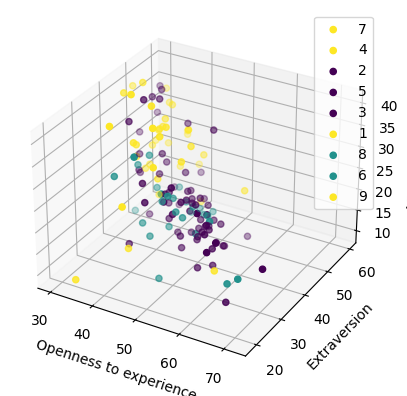

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for categoria in categorias:
    x = data[data['categoria'] == categoria]['op']
    y = data[data['categoria'] == categoria]['ex']
    z = data[data['categoria'] == categoria]['ag']
    c = data[data['categoria'] == categoria]['cluster']

    ax.scatter(x, y, z, c=c, label=categoria)

ax.set_xlabel('Openness to experience')
ax.set_ylabel('Extraversion')
ax.set_zlabel('Agreeableness')
plt.legend()
plt.show()

Podemos observar que el modelo de k-means ha agrupado los puntos en 3 clusters, cada uno representado por un color distinto.

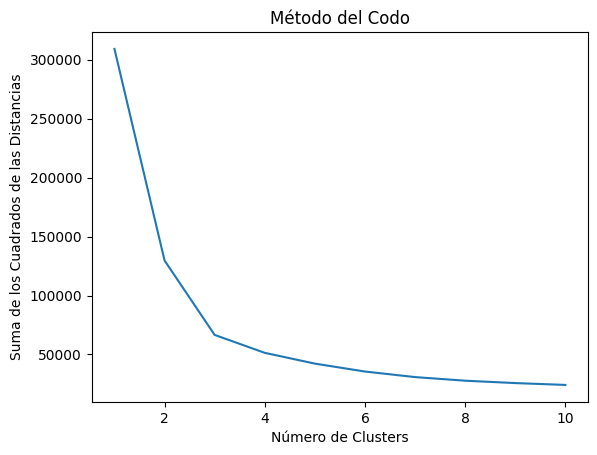

In [16]:
#Eliminamos la variable categórica
X = data.drop('categoria', axis=1)

#Calculamos la suma de los cuadrados de las distancias para diferentes valores de k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Graficamos el resultado
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Suma de los Cuadrados de las Distancias')
plt.show()